In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt


In [67]:
df = pd.read_csv("test.csv")
df.head()

,index,Sensor Name,Sensor Type,Latitude,Longitude,Location
0,0,Calumet Beach,Water,41.714739,-87.527356,"(41.714739000000002, -87.527355999999997)"
1,1,63rd Street Weather Station,Weather,41.780992,-87.572619,"(41.780991999999998, -87.572619000000003)"
2,2,63rd Street Beach,Water,41.784561,-87.571453,"(41.784560999999997, -87.571453000000005)"
3,3,Oak Street Weather Station,Weather,41.901997,-87.622817,"(41.901997000000001, -87.622816999999998)"
4,4,Foster Weather Station,Weather,41.976464,-87.647525,"(41.976464, -87.647525000000002)"


In [68]:
df.drop(['index', 'Sensor Type', 'Location'], axis='columns', inplace=True)

In [69]:
df.head()

,Sensor Name,Latitude,Longitude
0,Calumet Beach,41.714739,-87.527356
1,63rd Street Weather Station,41.780992,-87.572619
2,63rd Street Beach,41.784561,-87.571453
3,Oak Street Weather Station,41.901997,-87.622817
4,Foster Weather Station,41.976464,-87.647525


In [70]:
data = df[['Latitude', 'Longitude']].values

In [71]:
scaler = MinMaxScaler() #dont really need in our case since the values are not that much distinct.
data = scaler.fit_transform(data)

In [72]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(data)

KMeans(n_clusters=3, n_init=10)

In [73]:
sensor_names = df['Sensor Name'].values

In [74]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [75]:
centroids = scaler.inverse_transform(centroids)

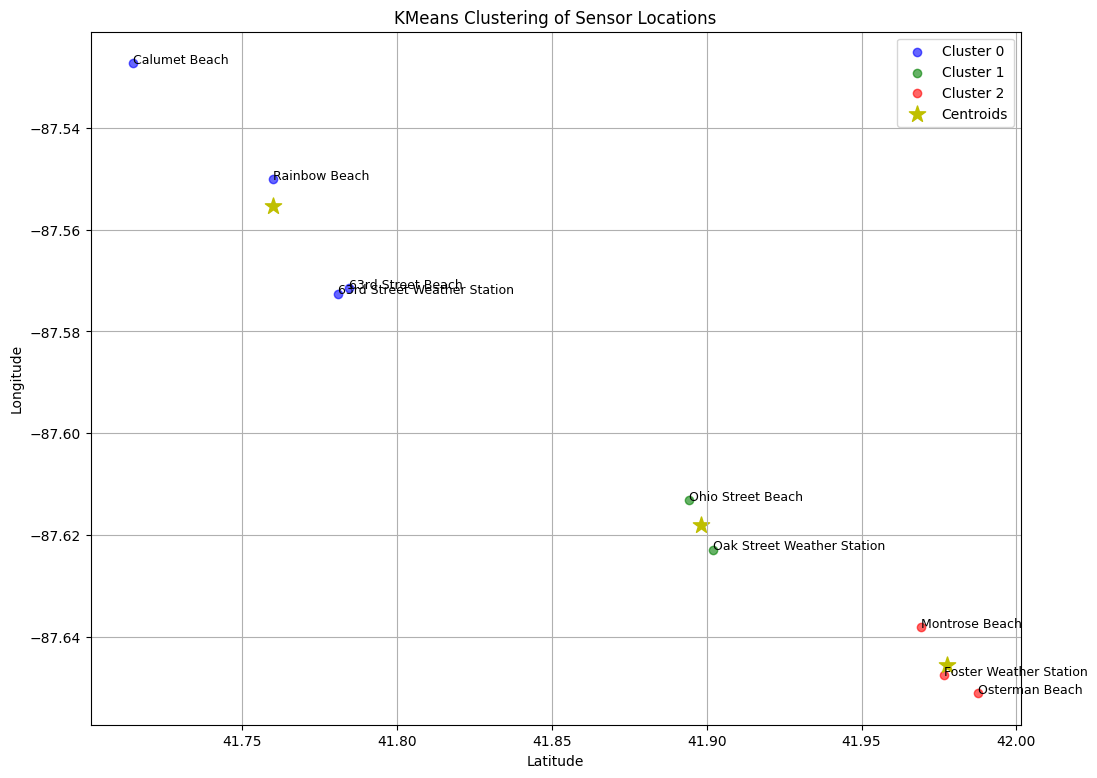

In [76]:
plt.figure(figsize=(12, 9))
colors = ['b', 'g', 'r']
for i in range(3):
    cluster_data = data[labels == i]
    cluster_data = scaler.inverse_transform(cluster_data)
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], alpha=0.6, label=f'Cluster {i}')
for i in range(len(data)):
    point = scaler.inverse_transform([data[i]])
    plt.text(point[0, 0], point[0, 1], sensor_names[i], fontsize=9)
    
plt.scatter(centroids[:, 0], centroids[:, 1], c='y', s=150, marker='*', label='Centroids')

plt.title('KMeans Clustering of Sensor Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True)
plt.show()